In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('raw_dataset.csv')
df = pd.DataFrame(data)
df

,Matreial hardness (HV),Data point count,Calibrated probe dimension,Re-calibration status
0,25.9,228,1.9887,2
1,25.9,482,1.9887,2
2,25.9,736,1.9887,2
3,25.9,990,1.9887,2
4,25.9,1244,1.9887,2
...,...,...,...,...
212,25.9,1346,1.9855,2
213,25.9,1620,1.9855,2
214,25.9,1786,1.9855,2
215,25.9,2348,1.9857,2


In [63]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Load your dataset into a pandas DataFrame
data = pd.read_csv("raw_dataset.csv")

# Separate the features (X) and the target (y)
X = data.drop("Re-calibration status", axis=1)  # Assuming "status" is your target column
y = data["Re-calibration status"]

In [65]:
smote = SMOTE(random_state=42)  # random seed for reproducibility
X_resampled, y_resampled = smote.fit_resample(X, y)
len(X_resampled), len(y_resampled)

(390, 390)

In [108]:
from sklearn.utils import shuffle

# Shuffle the resampled data
resampled_data = shuffle(resampled_data, random_state=42)
resampled_data

,Matreial hardness (HV),Data point count,Calibrated probe dimension,Re-calibration status
9,25.9,2488,1.988700,2
42,25.9,2341,1.986700,2
33,25.9,4202,1.988000,2
311,25.9,3860,1.985811,1
272,25.9,3474,1.985127,1
...,...,...,...,...
71,25.9,2702,1.986000,2
106,25.9,1930,1.983800,2
270,25.9,4632,1.982022,1
348,25.9,4769,1.983456,1


In [120]:
from collections import Counter

print("Class distribution before SMOTE:", Counter(y))
print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution before SMOTE: Counter({2: 195, 1: 195})
Class distribution after SMOTE: Counter({2: 195, 1: 195})


In [75]:
# Create a new DataFrame for the resampled data
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

# Save the resampled data to a CSV file
resampled_data.to_csv("resampled_dataset.csv", index=False)

In [77]:
df_1 = pd.read_csv('resampled_dataset.csv')
df_1

,Matreial hardness (HV),Data point count,Calibrated probe dimension,Re-calibration status
0,25.9,228,1.988700,2
1,25.9,482,1.988700,2
2,25.9,736,1.988700,2
3,25.9,990,1.988700,2
4,25.9,1244,1.988700,2
...,...,...,...,...
385,25.9,3860,1.984676,1
386,25.9,4208,1.984347,1
387,25.9,2554,1.985894,1
388,25.9,4641,1.985555,1


In [86]:
df_1.describe()

,Matreial hardness (HV),Data point count,Calibrated probe dimension,Re-calibration status
count,390.0,390.000000,390.000000,390.000000
mean,25.9,2548.505128,1.984989,1.500000
std,0.0,1312.572516,0.001636,0.500642
min,25.9,24.000000,1.980800,1.000000
25%,25.9,1538.750000,1.983846,1.000000
50%,25.9,2455.000000,1.984609,1.500000
75%,25.9,3668.000000,1.986000,2.000000
max,25.9,5004.000000,1.988700,2.000000


In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df_1.drop('Re-calibration status', axis=1)
y = df_1['Re-calibration status']

In [88]:
df_X = pd.DataFrame(X)
df_X

,Matreial hardness (HV),Data point count,Calibrated probe dimension
0,25.9,228,1.988700
1,25.9,482,1.988700
2,25.9,736,1.988700
3,25.9,990,1.988700
4,25.9,1244,1.988700
...,...,...,...
385,25.9,3860,1.984676
386,25.9,4208,1.984347
387,25.9,2554,1.985894
388,25.9,4641,1.985555


In [89]:
# Split the data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

In [119]:
df_y_train= pd.DataFrame(y_train)
df_y_train
df_x_train= pd.DataFrame(X_train)

result = pd.concat([df_x_train, df_y_train], axis=1)

print( 'result' ,len(result))

result 273


 use these hyperparameters if the processing power is not sufficient
n_estimators=10, max_depth=6, random_state=11, criterion='gini', max_features="sqrt"

In [96]:


clf=rf_classifier = RandomForestClassifier(n_estimators=10, max_depth=6, random_state=11, criterion='gini', max_features="sqrt")

rf_classifier.fit(X_train, y_train ) 
# Make predictions on the validation set
y_val_pred = rf_classifier.predict(X_val)

# Evaluate the model's performance on the validation set
validation_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {validation_accuracy:.2f}")

# Make predictions on the test set
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

y_train_pred = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy:.2f}")

Validation Accuracy: 0.88
Test Accuracy: 0.86
Train Accuracy: 0.94


Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.91      0.88        33
           2       0.88      0.81      0.84        26

    accuracy                           0.86        59
   macro avg       0.87      0.86      0.86        59
weighted avg       0.87      0.86      0.86        59



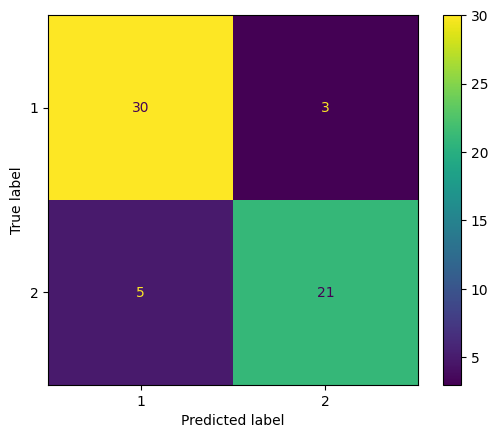

In [101]:
# Make predictions on the test set
py_predict = clf.predict(X_test)

# classifier's performance on test set
accuracy = accuracy_score(y_test, py_predict, normalize=True)
confusion = confusion_matrix(y_test, py_predict,labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion,display_labels=clf.classes_)

classification_rep = classification_report(y_test, py_predict)

print(f"Accuracy: {accuracy:.2f}")
#print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)
df_4=pd.DataFrame({'Actual':y_test, 'Predicted':py_predict})

disp.plot()


Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.92      0.87        26
           2       0.93      0.84      0.89        32

    accuracy                           0.88        58
   macro avg       0.88      0.88      0.88        58
weighted avg       0.88      0.88      0.88        58



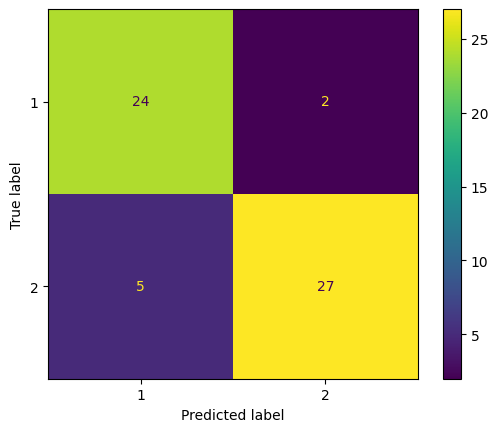

In [107]:
# classifier's performance on validation dataset
py_predict= rf_classifier.predict(X_val)
accuracy = accuracy_score(y_val, py_predict, normalize=True)
confusion = confusion_matrix(y_val, py_predict,labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion,display_labels=clf.classes_)

classification_rep = classification_report(y_val, py_predict)

print(f"Accuracy: {accuracy:.2f}")
#print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)
df_5=pd.DataFrame({'Actual':y_val, 'Predicted':py_predict})

disp.plot()
#df_5

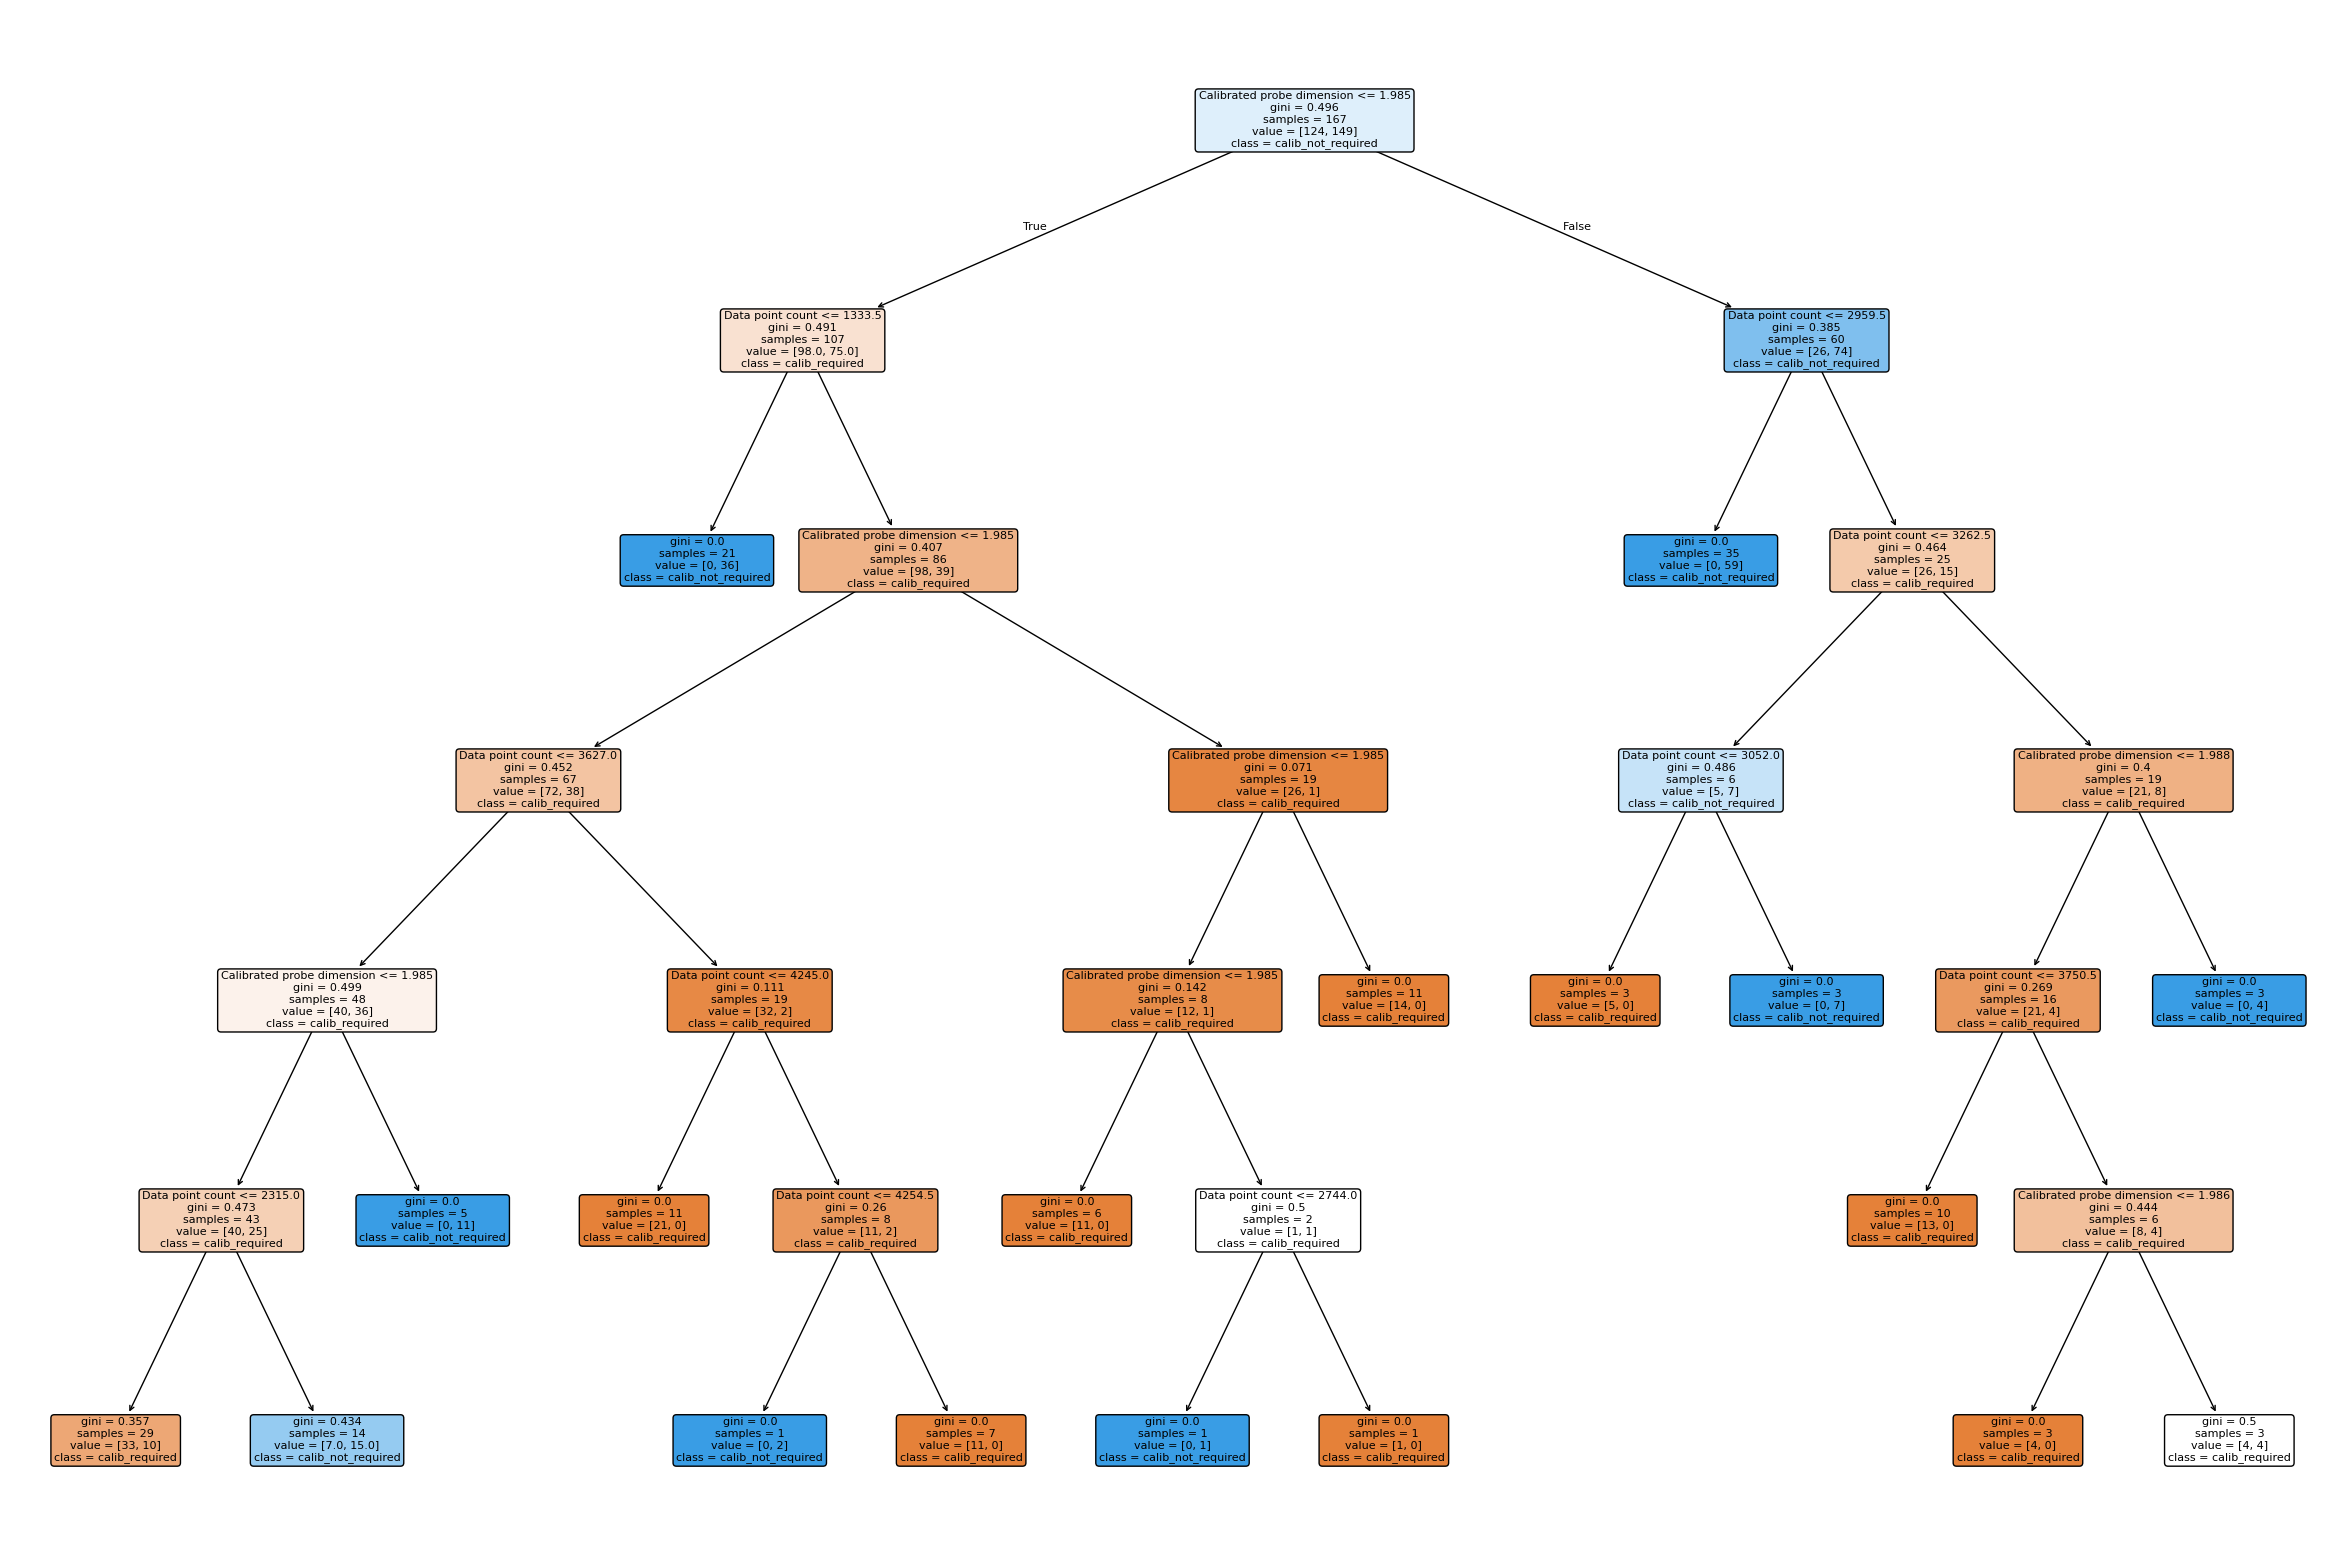

In [106]:
#ALTERNATIVE

feature_name= list(df.columns)
class_name = [ 'calib_required', 'calib_not_required']
#class_name = list(str(df_x_train))

# tree from the forest
Tree = clf.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(30,20))
tree.plot_tree(Tree,filled=True, rounded=True, fontsize=8, feature_names=feature_name, class_names=class_name);

In [55]:
#HYPERPARAMETER Cross Validation CV
grid_parameter= {
    'n_estimators' : [10,100, 1000],
    'criterion':['gini','entropy'],
    'max_depth': range(5,30,1),
    'random_state' : range(5,30,1)
}

In [57]:
grid_search = GridSearchCV( estimator=clf, param_grid= grid_parameter, cv=10, n_jobs=-1,verbose=0)

In [ ]:
grid_search.fit(X_train, y_train)

In [28]:
#best parameter
best_parameter= grid_search.best_params_
print(best_parameter)


{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 10, 'random_state': 11}


{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 10, 'random_state': 11}


In [116]:
#Compute errors for test dataset
from sklearn.metrics import root_mean_squared_error
err_prediction = clf.predict(X_test)
rmse_test = root_mean_squared_error(y_test, err_prediction)
print("ROOT MEAN SQUARE ERROR", rmse_test)

ROOT MEAN SQUARE ERROR 0.3682298471593293


In [118]:
#Compute errors for validation dataset
err_prediction = clf.predict(X_val)
rmse_val = mean_squared_error(y_val, err_prediction)

print("ROOT MEAN SQUARE ERROR", rmse_val)

ROOT MEAN SQUARE ERROR 0.1206896551724138
